## 자치구별 교통사고 상해 피해정도 비교

In [2]:
import pandas as pd

df = pd.read_csv('/Users/choedeock-u/PycharmProjects/pds_capstone1/dataset/kr_교통사고데이터_전처리_수정.csv')

In [3]:
df.head()

,사고발생_년도,사고발생_월,사고발생_일,사고발생_시간,자치구명,행정동,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고세부유형,법규위반,큰도로형태,세부도로형태,가해운전자 상해정도,피해운전자 상해정도
0,2014년,1월,1일,00시,강북구,번동,경상사고,0,0,1,0,횡단중,안전운전불이행,단일로,기타,기타불명,경상
1,2014년,1월,1일,00시,강동구,천호동,중상사고,0,1,0,0,횡단중,보행자보호의무위반,교차로,교차로부근,상해없음,중상
2,2014년,1월,1일,02시,관악구,봉천동,중상사고,0,1,0,0,차도통행중,안전운전불이행,단일로,기타,상해없음,중상
3,2014년,1월,1일,23시,영등포구,영등포동,중상사고,0,1,0,0,횡단중,보행자보호의무위반,교차로,교차로부근,상해없음,중상
4,2014년,1월,2일,22시,동대문구,전농동,중상사고,0,1,0,0,횡단중,보행자보호의무위반,단일로,기타,상해없음,중상


In [15]:
# 교통사고 피해정도 비교를 위해
# 자치구 확인
print(len(df['자치구명'].unique()))
print(df['자치구명'].unique())

25
['강북구' '강동구' '관악구' '영등포구' '동대문구' '동작구' '광진구' '중랑구' '중구' '금천구' '구로구' '강남구'
 '송파구' '강서구' '양천구' '노원구' '성북구' '종로구' '마포구' '용산구' '서대문구' '은평구' '서초구' '도봉구'
 '성동구']


In [5]:
# 자치구 그룹화 후 각 자치구별로 데이터 개수 확인
grouped = df.groupby('자치구명')
print(grouped.size())

자치구명
강남구     707
강동구     386
강북구     413
강서구     441
관악구     443
광진구     296
구로구     419
금천구     272
노원구     438
도봉구     268
동대문구    475
동작구     385
마포구     474
서대문구    320
서초구     485
성동구     258
성북구     526
송파구     613
양천구     334
영등포구    610
용산구     308
은평구     422
종로구     411
중구      387
중랑구     452
dtype: int64


In [6]:
# 자치구별 피해상해정도 종류 개수
result = df.groupby('자치구명')['피해운전자 상해정도'].nunique()
print(result)

자치구명
강남구     4
강동구     5
강북구     5
강서구     5
관악구     4
광진구     5
구로구     5
금천구     4
노원구     5
도봉구     4
동대문구    5
동작구     5
마포구     5
서대문구    4
서초구     5
성동구     4
성북구     6
송파구     5
양천구     5
영등포구    5
용산구     4
은평구     4
종로구     4
중구      5
중랑구     5
Name: 피해운전자 상해정도, dtype: int64


In [7]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프를 잘 출력하기 위해 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'

In [13]:
# 자치구별 '상해정도' 컬럼 값의 개수 카운트
result = df.groupby(['자치구명', '피해운전자 상해정도']).size().unstack()

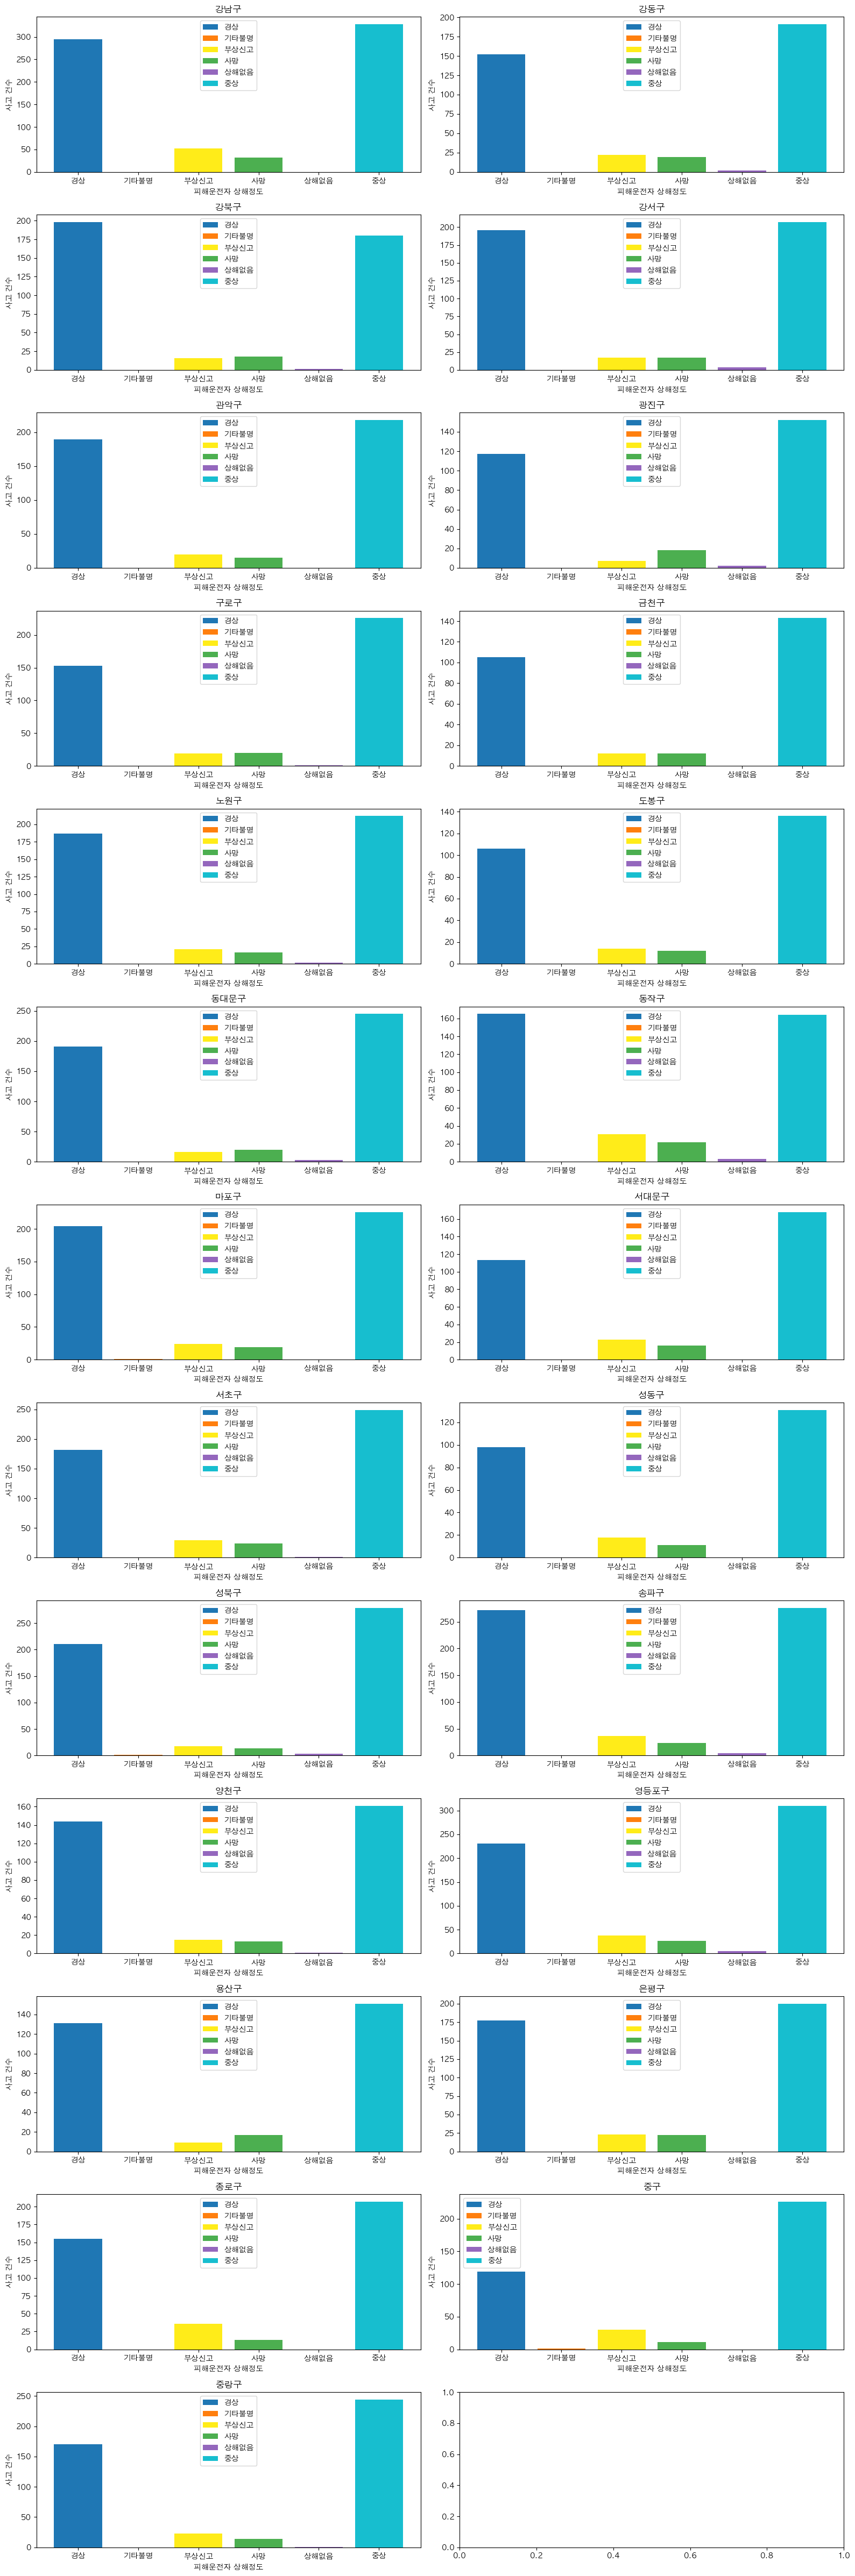

In [12]:
# 그래프 그리기
# 크기 조절
fig, axes = plt.subplots(nrows=13, ncols=2, figsize=(16, 48))  # 13행 2열로 그래프 그리기

# 상해정도별 색상 리스트
colors = ['#1f77b4', '#ff7f0e', '#ffec19', '#4caf50', '#9467bd', '#17becf']

# 각 자치구별로 그래프 그리기
for i, (idx, row) in enumerate(result.iterrows()):
    row_idx = i // 2
    col_idx = i % 2
    ax = axes[row_idx, col_idx]
    bars = ax.bar(row.index, row.values, color=colors[:len(row)])
    ax.set_title(f'{idx}')  # 각 그래프의 제목을 자치구명으로 지정
    ax.set_xlabel('피해운전자 상해정도')
    ax.set_ylabel('사고 건수')
    ax.legend(bars, row.index)  # 범례 추가

plt.tight_layout()
plt.savefig('자치구별_피해운전자_상해정도.png')  # 출력되는 그래프를 png파일로 저장
plt.show()